In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Table of Contents
* [Project objectives](#section_1_1)
* [Data sources](#section_2_1)
* [Stages of analysis](#section_3_1)
* [Analysis of cars dataset](#section_4_1)
    * [Understanding the data](#section_4_2)
    * [Data preparation](#section_4_3)
    * [Exploratory Data Analysis ](#section_4_4)
    * [Identifying potentially wrong data ](#section_5_4) 
    * [Handling potentially wrong data ](#section_6_4)
        * [Replacing the suspicious data with mean values ](#section_7_4)
        * [Dropping the suspicious data with mean values ](#section_8_4)
        * [Comparison of the results ](#section_9_4)
        * [Conclusions ](#section_10_4)
        
* [Building regression models](#section_20_1)
    * [Theoretical information](#section_20_2)
    * [Experiment 1 - liner regression](#section_20_3)
    * [Experiment 2 - liner regression with more features](#section_20_4)
    * [Experiment 3 - LASSO](#section_20_5)
        * [LASSO - Theoretical information](#section_20_6)
        * [LASSO - Coding](#section_20_7)
    * [Experiment 4 - RandomForestRegressor](#section_20_8)
        * [RandomForestRegressor - Theoretical information](#section_20_9)
        * [RandomForestRegressor - Coding](#section_20_10)
    * [Experiment 5  - Per brand models](#section_20_11)
* [CO2 emissions dataset analysis](#section_30_1)
    * [Understanding and prepation of CO2 emissions data](#section_30_2)
    * [CO2 emissions data - EDA](#section_30_3)
* [Merging CO2 Emissions and Cars datasets ](#section_40_1)

### Project objectives: <a class="anchor" id="section_1_1"></a>
* Determine which features have the biggest impact on determining the price of a car
* Reveal the hidden relationships in the cars dataset
* Find the model that produces the most accurate prediction score
* Analyze a secondary dataset that contains information regarding cars and their CO2 footprint
* Combine the two datasets and prepare a third one that show how much CO2 a given car produced

### Data sources: <a class="anchor" id="section_2_1"></a>
* <a href="https://www.kaggle.com/datasets/ander289386/cars-germany">Cars Dataset</a>
* <a href="https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles">CO2 Emission by Vehicles</a>

### Stages of analysis: <a class="anchor" id="section_3_1"></a>
* Data understanding 
    * shape
    * head / tail
    * dtypes
    * describe 
* Data Preparation
    * Dropping irrelevant columns and rows or rename them
    * Finding the null values
    * Finding duplicates (if any)
* EDA - Finding relationship using
    * bars
    * histograms
    * KDE
    * correlations
    * heatmap


## Cars dataset analysis  <a class="anchor" id="section_4_1"></a>

#### Understanding cars data <a class="anchor" id="section_4_2"></a>

In [3]:
# Load the data and create cars dataframe
cars = pd.read_csv("data/autoscout24-germany-dataset.csv")

In [4]:
# Check dataframe shape
cars.shape

(46405, 9)

The shape method returns a tuple that indicates the number of obesrvations and features. In this particular case we have 46405 rows (records for cars) and 9 columns (features)

In [5]:
def get_data_info(dataset):
    """
    Returns the number of observations and features 
    """
    observations, features = dataset.shape
    return f"{observations} number of observations with {features} features"

In [6]:
# A small function that utilizes shape method and returns more readable output
print(get_data_info(cars))

46405 number of observations with 9 features


In [7]:
# By default the head method returns the first five rows of data. 
# The method accepts an int value. To check the first ten rows, we can execute cars.head(10)
cars.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [8]:
# By default the tail method returns the last five rows of data. 
# The method accepts an int value. To check the last 20 rows, we can execute cars.tail(20)
cars.tail()

,mileage,make,model,fuel,gear,offerType,price,hp,year
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46404,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [9]:
# As each column in pd is a series and each series has a type, we can check dtypes of our dataframe
cars.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
year           int64
dtype: object

<b>Notes:</b> No unexpected types here. The mileage, price, hp and year are numberic, while the other are objects (strings)

In [10]:
# Now we can see some statistics about the numeric data
# For better readability we will flip the rows and columns 
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,46405.0,71177.864109,62625.308456,0.0,19800.0,60000.0,105000.0,1111111.0
price,46405.0,16572.337227,19304.695924,1100.0,7490.0,10999.0,19490.0,1199900.0
hp,46376.0,132.990987,75.449284,1.0,86.0,116.0,150.0,850.0
year,46405.0,2016.012951,3.155214,2011.0,2013.0,2016.0,2019.0,2021.0


<b>Notes:</b> What we see here are the columns that contain numeric values, count, mean, std, min, max and 25th, 50th, and 75th percentiles. The fact that not all values in count column are not the same suggests that a closer look needs to be taken. 

In [11]:
# Getting some basic statistics manually:
def get_min_max_values(dataset, list_of_features):
    """
    Returns name, min, mean, max and std for each feature
    """
    print ("{:<10} {:<10} {:<10} {:<10} {:<10}".format('Feature','Min','Mean','Max', 'STD'))
    for feature in list_of_features:
        min_val = dataset[feature].min()
        mean_val = f"{dataset[feature].mean():.2f}"
        max_val = dataset[feature].max()
        std = f"{dataset[feature].std():.2f}"
        
        print ("{:<10} {:<10} {:<10} {:<10}{:<10}".format(feature, min_val, mean_val, max_val, std))

In [12]:
get_min_max_values(cars, ["mileage", "price", "hp", "year"])

Feature    Min        Mean       Max        STD       
mileage    0          71177.86   1111111   62625.31  
price      1100       16572.34   1199900   19304.70  
hp         1.0        132.99     850.0     75.45     
year       2011       2016.01    2021      3.16      


#### A few interesting directions to look at:
* There is at least one car with mileage 0 
* There is at least one  car with hp = 1
* The segment of cars covered is between 2011 and 2021
* The difference between the min and max price is over 1000K times 

In [13]:
# When looking at cars with mileage 0, we find mostly cards produces in 2021
# Mileage 0 for a brand new car looks realistic
cars[(cars["mileage"] < 1)]

,mileage,make,model,fuel,gear,offerType,price,hp,year
2276,0,Hyundai,Kona,Electric,Manual,Used,44750,204.0,2021
2909,0,Land,Rover Discovery,Diesel,Automatic,Demonstration,79999,300.0,2021
5054,0,Hyundai,i10,Gasoline,Manual,New,12579,67.0,2021
5673,0,Hyundai,i30,Gasoline,Automatic,Demonstration,23450,140.0,2020
6110,0,Renault,Clio,Gasoline,Manual,Pre-registered,17250,91.0,2021
...,...,...,...,...,...,...,...,...,...
45900,0,Fiat,500,Gasoline,Manual,Pre-registered,13990,71.0,2021
45914,0,Abarth,595C,Gasoline,Manual,Demonstration,27290,179.0,2021
45979,0,Skoda,Kamiq,Gasoline,Manual,Pre-registered,18490,95.0,2021
45996,0,Dacia,Duster,Gasoline,Manual,Pre-registered,18080,131.0,2021


In [14]:
# There are however 13 other cars that look suspicious 
cars[(cars["mileage"] < 1) & (cars["year"] != 2021)]

,mileage,make,model,fuel,gear,offerType,price,hp,year
5673,0,Hyundai,i30,Gasoline,Automatic,Demonstration,23450,140.0,2020
11946,0,Renault,Twingo,Gasoline,Manual,Used,10490,69.0,2018
13263,0,Ford,Kuga,Gasoline,Manual,Pre-registered,27900,150.0,2020
14085,0,Hyundai,iX20,Gasoline,Automatic,Used,17835,125.0,2019
15375,0,Dacia,Sandero,Gasoline,Manual,Used,11590,90.0,2019
15384,0,Ford,Ka/Ka+,Gasoline,Manual,Used,11990,86.0,2019
22785,0,Hyundai,i30,Gasoline,Manual,Pre-registered,19990,120.0,2020
24273,0,Lada,Niva,Gasoline,Manual,Used,16565,83.0,2019
24296,0,Hyundai,i10,Gasoline,Manual,Pre-registered,15790,101.0,2020
27669,0,Hyundai,Kona,Gasoline,Manual,Pre-registered,17990,120.0,2020


In [15]:
# We have also 9 cars with suspiciously lower number of hp
# Probably those are wrongly written numbers 
cars[(cars["hp"] < 2)]

,mileage,make,model,fuel,gear,offerType,price,hp,year
9110,167000,Renault,Megane,Diesel,Manual,Used,5450,1.0,2012
13030,800,Others,NaN,Others,NaN,Used,2450,1.0,2019
25878,2000,Others,NaN,Others,NaN,Used,10999,1.0,2015
26088,2000,Others,NaN,Others,NaN,Used,10999,1.0,2015
28064,100,Volkswagen,NaN,Others,NaN,Demonstration,2600,1.0,2019
28065,100,Trailer-Anhänger,NaN,Others,NaN,Used,2800,1.0,2019
36204,302000,Toyota,Prius+,Electric/Gasoline,NaN,Used,7985,1.0,2013
44072,1,Trailer-Anhänger,NaN,Others,NaN,Used,2500,1.0,2019
44540,5000,Volvo,NaN,Others,NaN,Used,2499,1.0,2020


In [16]:
# We can find min and max years using:
print(f'Min. year : {cars["year"].min()}')
print(f'Max. year : {cars["year"].max()}')

Min. year : 2011
Max. year : 2021


In [17]:
# We can also find the ratio between the min and max price
car_min_price = cars["price"].min()
car_max_price = cars["price"].max()
print(f"Ratio between min and max price: {car_max_price / car_min_price:.2f} ")

Ratio between min and max price: 1090.82 


<b>Notes:</b> The high ratio suggests that most probably car models/makes are different. Let's check that out:

In [18]:
cars[(cars["price"] == car_min_price)]

,mileage,make,model,fuel,gear,offerType,price,hp,year
23464,204000,Citroen,C1,Gasoline,Manual,Used,1100,68.0,2011


In [19]:
cars[(cars["price"] == car_max_price)]

,mileage,make,model,fuel,gear,offerType,price,hp,year
21675,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775.0,2017


<b>Notes:</b> It is important to take into account that the data contains information about different models and makes. If we put Ferrari amongst Citroen models, it may appear as an outlier. That is why each make needs to be checked individually 

#### Data preparation <a class="anchor" id="section_4_3"></a>

In [20]:
# Get a list of all columns
cars.columns

Index(['mileage', 'make', 'model', 'fuel', 'gear', 'offerType', 'price', 'hp',
       'year'],
      dtype='object')

In [21]:
# The column name offerType is not important for this project. We drop it. 
# This is also known as subsetting. axis = 1 indicates that this is not a row, but a column
cars = cars.drop(["offerType"], axis = 1)

In [22]:
# We can also rename columns. Example:
cars = cars.rename(columns = {"make": "brand"})

In [23]:
# Now we need to identify the missing values
# Using isna and sum we will see the number of missing value per column
cars.isna().sum()

mileage      0
brand        0
model      143
fuel         0
gear       182
price        0
hp          29
year         0
dtype: int64

In [24]:
# This is how we drop all of the missing values 
cars = cars.dropna()

In [25]:
# Similarly we will check if we have duplicate values in our data
cars.loc[cars.duplicated()]

,mileage,brand,model,fuel,gear,price,hp,year
198,15,Fiat,Panda,Electric/Gasoline,Manual,10980,69.0,2021
201,9,Toyota,Aygo,Gasoline,Manual,11490,72.0,2021
202,9,Toyota,Aygo,Gasoline,Manual,11490,72.0,2021
207,10,Toyota,Aygo,Gasoline,Manual,11990,72.0,2021
208,10,Toyota,Aygo,Gasoline,Manual,11990,72.0,2021
...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,12990,71.0,2021


In [26]:
# Here we drop the duplicate values and reset the index
# The second command is needed in order to have a properly structured index
cars = cars.drop_duplicates()
cars.reset_index(drop = True)

,mileage,brand,model,fuel,gear,price,hp,year
0,235000,BMW,316,Diesel,Manual,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,6950,156.0,2011
...,...,...,...,...,...,...,...,...
43911,10,Citroen,C1,Gasoline,Manual,12340,72.0,2021
43912,99,Fiat,500,Electric/Gasoline,Manual,12490,71.0,2021
43913,550,Fiat,500,Electric/Gasoline,Manual,12805,69.0,2021
43914,837,Fiat,Panda,Electric/Gasoline,Manual,12805,69.0,2021


#### Understanding the features and their relationships - EDA <a class="anchor" id="section_4_4"></a>

<b>Notes:</b> Now that we have a good understanding of our data, we can start exploring it.  The year column is a good candicate for deeper look. Using bars we can find out how many cars per year were produced

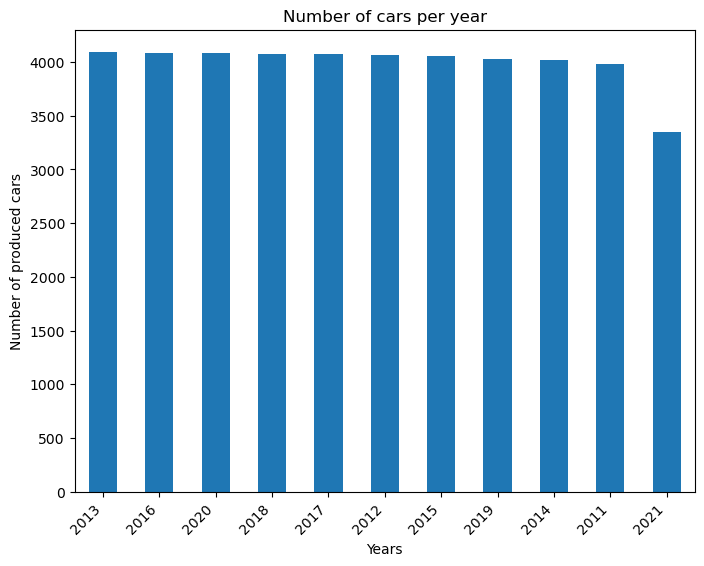

In [27]:
# Number of cars per year
plt.figure(figsize = (8, 6))
cars["year"].value_counts() \
    .plot(kind="bar")
plt.xlabel("Years")
plt.ylabel("Number of produced cars")
plt.title("Number of cars per year")
plt.xticks(rotation=45, ha='right')
plt.show()

<b>Notes: </b>What we see here is that in each year the numbers of produced cars is identical. This applies to all years, except for 2021. 

We can also group the data on the basis of year and check the average prices of cars per year. Even without any knowledge in cars sector, we can clearly see a tendecy of increasing prices. If we assume the tendecy is kept intact, we can conclude that cars produced in 2022 will cost more than 2021. 

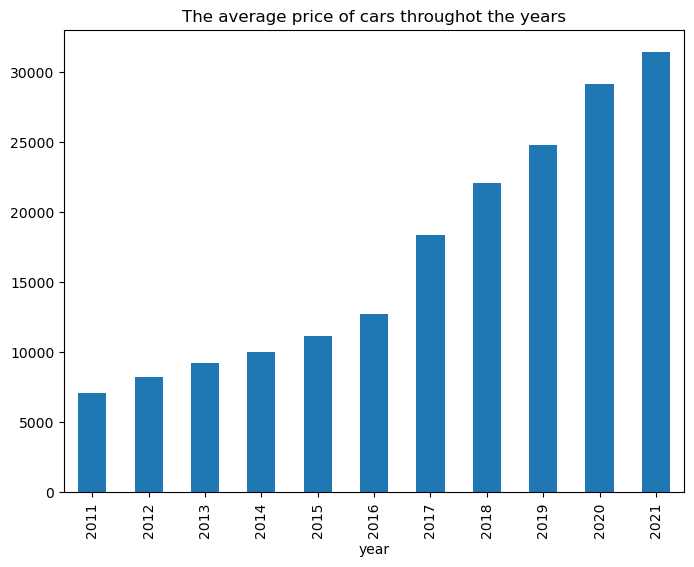

In [28]:
plt.figure(figsize = (8, 6))
cars.groupby("year")["price"].mean().plot(kind = 'bar')
plt.title("The average price of cars throughot the years")
plt.show()

<b>Notes:</b> on <u>Number of cars per year</u> and <u>The average price of cars throughot the years</u> plots we see a pretty much unchanged rate of car productions (the numbers are identical) and increasing rate of prices. This means that people on average spent more money for cars. This is strongly correlated with one way more general tendecy that describes the cost of live as constantly raising line.

Let's run seaborn's countplot to check the total number of cars per company that we have in our data. We see that there are more than 6000 cars for the company Volkswagen, over 4000 Opels and Fords and so on. We also see that there several brands with really small number of cars 

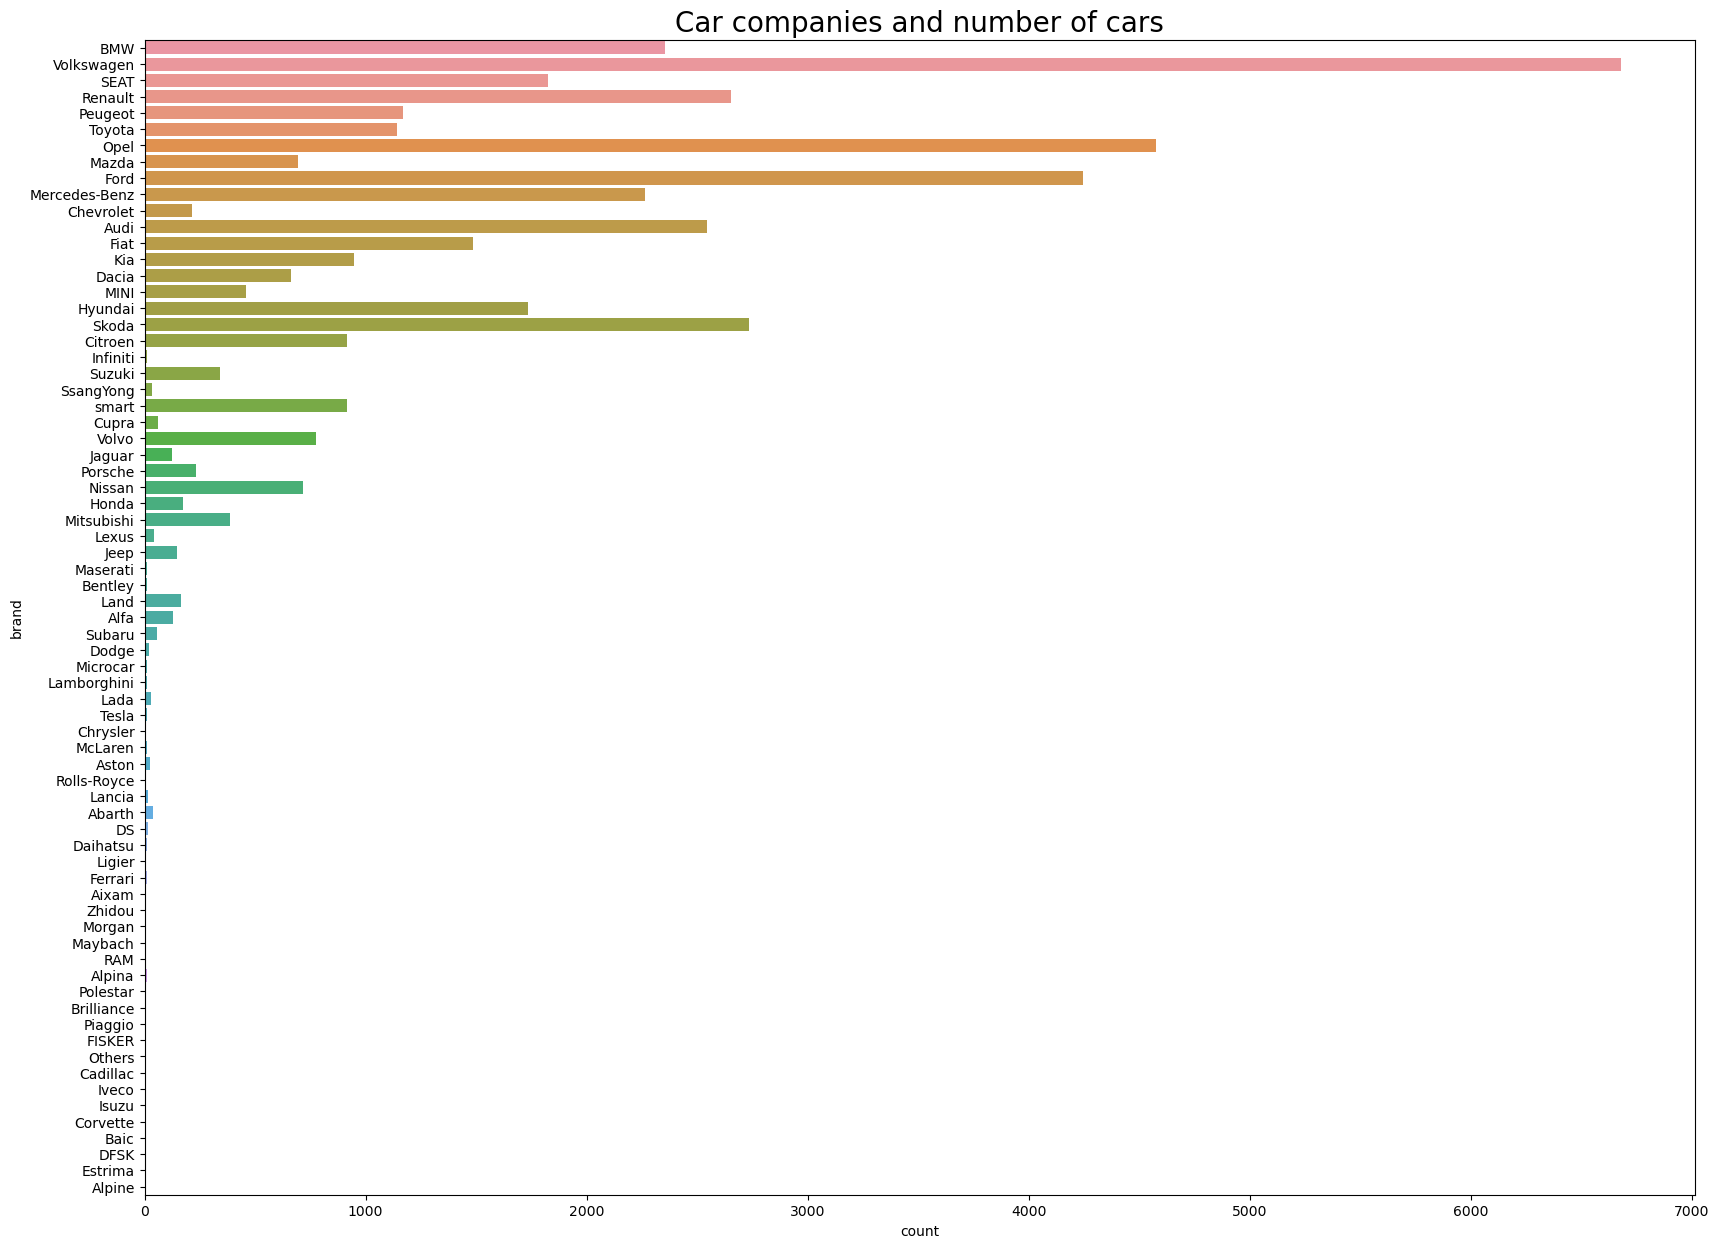

In [29]:
plt.figure(figsize = (20, 15))
sns.countplot(y = cars["brand"])
plt.title("Car companies and number of cars", fontsize = 20)
plt.show()

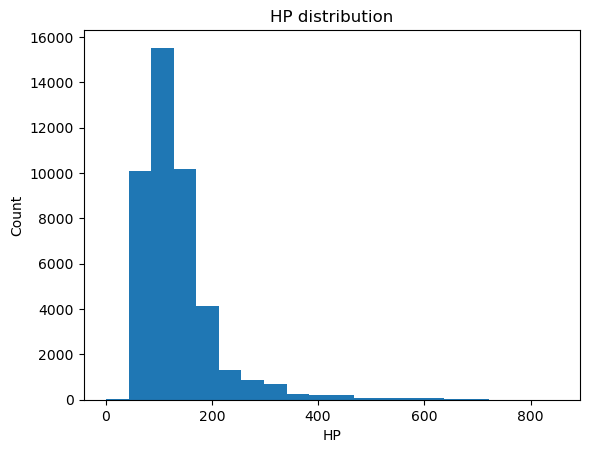

In [30]:
# Now let's see the distribution of hp 
cars["hp"].plot(kind = "hist", \
                bins = 20, \
                title = "HP distribution")
plt.xlabel("HP")
plt.ylabel("Count")
plt.show()

<b>Notes: </b> From this plot we can conclude that the friequency gravitates around 120 hp.  We also see that some data points (observations) are far away from the most populated bins.  Considering the fact that we are looking at a dataset that contains a variety of brands, those points may not be necessarily outliers 

In [31]:
# Looking at the list of the most powerful cars, we could accept those as valid data rather than wrong values
cars[(cars["hp"] > 400)]

,mileage,brand,model,fuel,gear,price,hp,year
386,8770,Jaguar,F-Pace,Gasoline,Automatic,79980,551.0,2019
717,35800,Maserati,GranTurismo,Gasoline,Automatic,109460,460.0,2016
718,65500,Bentley,Continental,Gasoline,Automatic,122500,635.0,2016
758,15186,Audi,SQ7,Diesel,Automatic,67480,435.0,2019
759,5715,Audi,RS,Gasoline,Automatic,69999,450.0,2019
...,...,...,...,...,...,...,...,...
46329,100,Aston,Martin V8,Gasoline,Automatic,147900,510.0,2021
46332,41,Land,Rover Range Rover,Gasoline,Automatic,162900,566.0,2021
46333,1500,Aston,Martin DB11,Gasoline,Automatic,219900,639.0,2021
46352,1000,Alpina,B3,Gasoline,Automatic,89900,462.0,2021


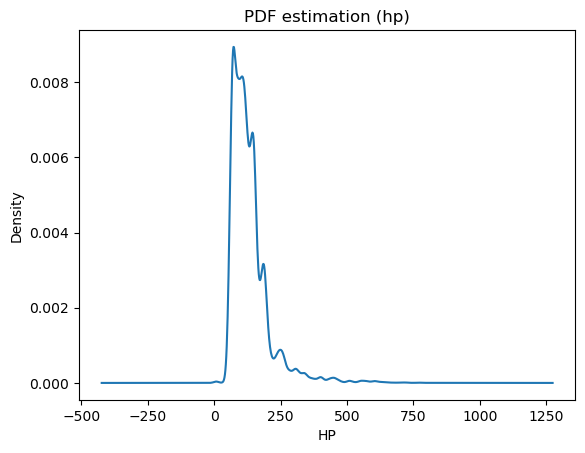

In [32]:
# Using kernel density estimation (KDE) we can also estimate the probability density of hp column
cars["hp"].plot(kind = "kde", \
                title = "PDF estimation (hp)")
plt.xlabel("HP")
plt.ylabel("Density")
plt.show()

<b>Notes: </b> Looking at fuel types, we see a bit expected results. Majority of the case use  gasoline, followed by diesel and semi-electric cars:

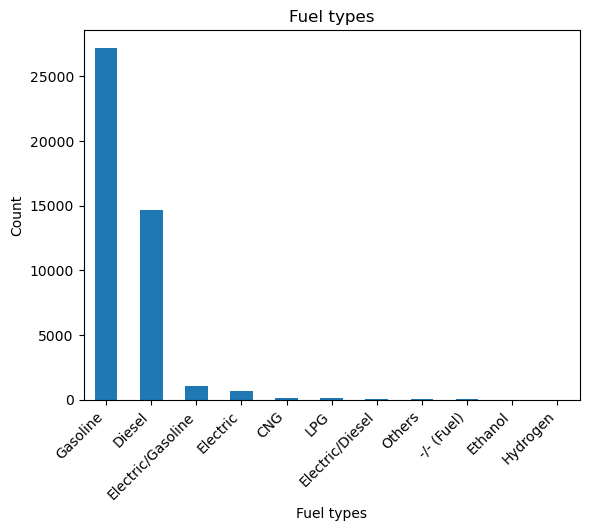

In [33]:
# Bars to visualize the fuel types
cars["fuel"].value_counts() \
    .plot(kind="bar")
plt.xlabel("Fuel types")
plt.ylabel("Count")
plt.title("Fuel types")
plt.xticks(rotation=45, ha='right')
plt.show()

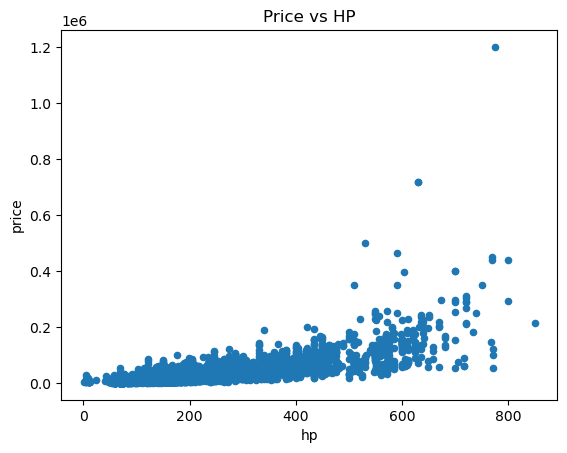

In [34]:
# Now let's check how price and hp features are related:
cars.plot(kind = "scatter", \
         x = "hp", \
         y = "price", \
         title = "Price vs HP")
plt.show()

<b>Notes: </b> We can clearly see the following tendency - the more horsepowers the higher price. We can expect strong correlation here

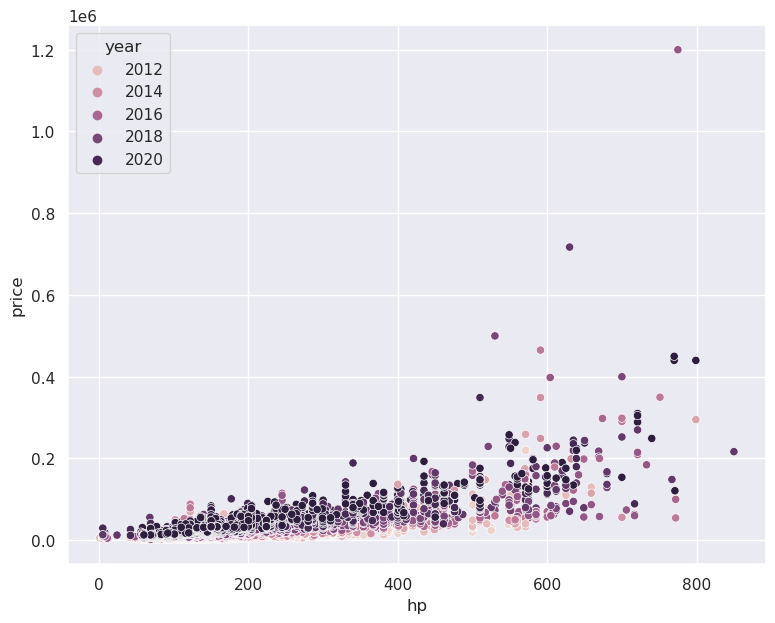

In [35]:
# If we add the year to the above equation, we see that the new parameter also plays a significant role:
sns.set(rc={'figure.figsize':(9,7)})
sns.scatterplot(x = "hp", \
                y = "price", \
               hue = "year", \
               data = cars)

plt.show()

<b>Notes: </b> What we see here is that as the year advances, the new cars become more powerful which subsequntly increases their prices 

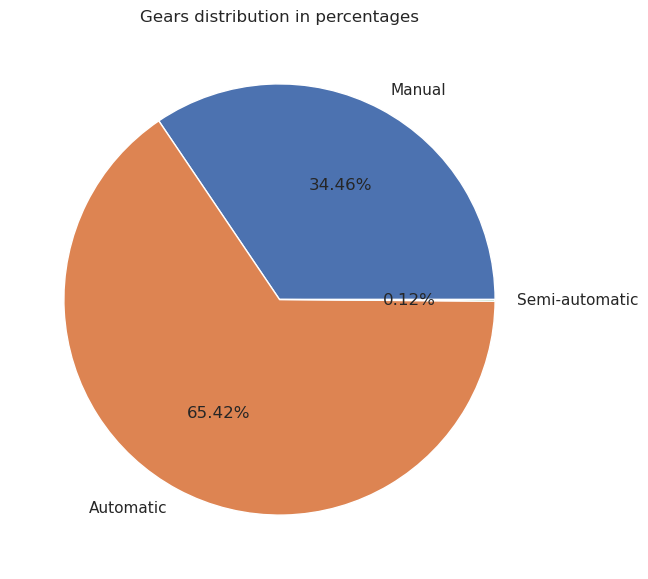

In [36]:
# We can also check the gear column. Here is how the different 
# gears are distributed in terms of percentages
grouped_models = cars.groupby(cars["gear"]).size()
unique_models = list(cars["gear"].dropna().unique())
plt.pie(labels = unique_models ,x = [i for i in grouped_models],autopct = "%.2f%%")
plt.title("Gears distribution in percentages")
plt.show()

<b> Conclusion: </b> 2/3 of the people prefer automatic transmission 

Now we can try and find potential correlation between the numeric features For better precision we want NULL values to be remove before calling corr method

In [37]:
# Create correlation matrix
cars_initial_corr = cars[["price", "mileage", "hp", "year"]].dropna().corr() # We will use this for comparison
cars[["price", "mileage", "hp", "year"]].dropna().corr()

,price,mileage,hp,year
price,1.000000,-0.305662,0.745084,0.411666
mileage,-0.305662,1.000000,-0.023283,-0.670236
hp,0.745084,-0.023283,1.000000,0.182632
year,0.411666,-0.670236,0.182632,1.000000


<b>Notes:</b>
 * On the main diagonal we see a perfect correlation. This is because the feature correlates perfectly with itself
 * There is also a good correlation between price and hp. This means that if the hp goes up, the price will almost certainly rise
 * Strong inverse correlation between mileage and year can be noticed. This can be interpreted as the newer year of car production, the lower mileage counter. 

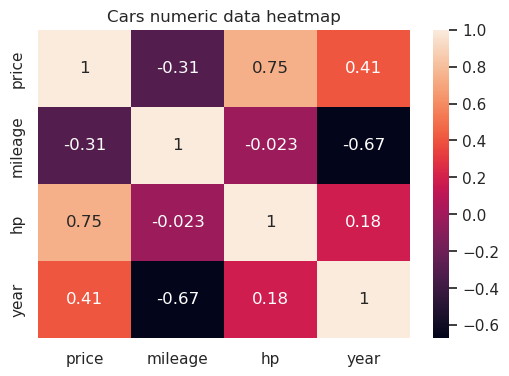

In [38]:
# A better visualization of the above data can be achieved by passing the result of corr method to 
# sns.heatmap:
plt.figure(figsize = (6,4))
sns.heatmap(cars[["price", "mileage", "hp", "year"]].dropna().corr(), annot = True)
plt.title("Cars numeric data heatmap")
plt.show()

In [39]:
cars[(cars["hp"]) < 6]

,mileage,brand,model,fuel,gear,price,hp,year
1985,21800,Microcar,Due,Diesel,Automatic,8490,5.0,2017
7085,18137,Ligier,JS 50,Diesel,Automatic,9950,5.0,2016
9110,167000,Renault,Megane,Diesel,Manual,5450,1.0,2012
12236,49670,Microcar,M.Go,Diesel,Automatic,4950,5.0,2011
18544,51355,Renault,Twizy,Electric,Automatic,4990,5.0,2017
25859,15766,Microcar,M8,Diesel,Manual,3900,5.0,2014
30006,10,Hyundai,Kona,Electric/Gasoline,Automatic,29490,5.0,2020
30563,24000,Microcar,M.Go,Diesel,Automatic,8200,5.0,2016
34306,17413,Microcar,M.Go,Diesel,Automatic,7990,5.0,2011
37859,1200,Aixam,City,Electric,Automatic,8500,5.0,2014


#### Identifying potentially wrong data <a class="anchor" id="section_5_4"></a>

<b>Notes:</b> In cells 15, 16 and 17 we noticed some observations with suspiciously low numers. For example mileage 0 or hp 1
Here is the data we would like to look closer. When we collect infromation about cars with low mileage, we set the following criteria: 
 - cars with mileage under 1 km and at least one year old. 
 - Some repetitive manual checks show that cars with hp under 5 must be wrong observations. The limit of 5 hp seems legit as we can find Microcar Due model with 5 hp here https://www.autoscout24.com/lst/microcar/due

In [40]:
# Identifying potentially wrong data
cars_low_mileage = cars[(cars['mileage'] < 1) & (cars["year"] < 2021)] # 12 observations 
cars_low_hp = cars[(cars["hp"] < 5)] # 1 observation

#### Handling potentially wrong data <a class="anchor" id="section_6_4"></a>

When working with abservations that could be potentially wrong, we can act as if they are outliers:
1) We can drop them
2) We can replace them with mean, median or moda

Let's quickly check what would happen if we drop or replace them with the respective mean values:

In [41]:
#Before making modifications to the original dataframe, let's make a backup:
cars_bkp = cars.copy()

##### Replacing with mean values <a class="anchor" id="section_7_4"></a>

Since <b>cars_low_hp</b> contains only one observation, we will replace it manually 

In [42]:
# Find Renault Megane 2012 hp mean value
renault_megane_mean = round(cars[(cars['brand'] == "Renault") & (cars["model"] == "Megane")\
                                 & (cars["year"] == 2012)]["hp"].mean(), 2)

# Replace Renault Megane 2012 hp = 1.0 with the mean value for this brand / model / year
cars.loc[cars["hp"] <= 1 , "hp"] = renault_megane_mean

The subset called <b>cars_low_mileage</b> contains 12 observation, but in other cases it may house hundreds, so it would be better to think of some automation. Here is an example of such:
 - The function called <b>replace_zero_mileage_with_mean</b> accepts two dataframes - one that contains the low mileage cars and the original one
 - The first function starts iterating over the elements of the small set and on each round it calls <b>find_mean_values</b>
 - The second function accepts 5 parms and based on them it calculates mean value and returns it
 - After getting the return value <b>replace_zero_mileage_with_mean</b> updates the zero with that value

In [43]:
def find_mean_values(cars_orig, brand, model, hp, year):
    '''
    Returns mean value of a specified numeric column
    '''
    
    mean_value = round(cars_orig[(cars_orig["brand"] == brand) \
                                 & (cars_orig["model"] == model) \
                                 &(cars_orig["hp"] == hp) \
                                 & (cars_orig["year"] == year) \
                                 & (cars_orig["mileage"] > 0)] \
                                   ["mileage"].mean(), 2)
    return mean_value
    
def replace_zero_mileage_with_mean(low_mileage, cars_orig):
    '''
    Accepts low_mileage df and original df and returns updated original df with updates zero mileage
    '''
    for idx in low_mileage.index:
        brand = low_mileage["brand"][idx]
        model = low_mileage["model"][idx]
        hp = low_mileage["hp"][idx]
        year = low_mileage["year"][idx]
        mean_value = find_mean_values(cars_orig, brand, model, hp, year )
        cars_orig.loc[idx, "mileage"] = mean_value
    return cars_orig

In [44]:
# Run the automation
cars = replace_zero_mileage_with_mean(cars_low_mileage, cars)

It is quite possible some NAN (missing) values to appear. If find_mean_values function does not find matches it will not calculate mean value properly. So let's check our dataframe and remote those records


In [45]:
# Check if the df contain 
cars.isna().sum()

mileage    2
brand      0
model      0
fuel       0
gear       0
price      0
hp         0
year       0
dtype: int64

In [46]:
# Drop the rows that contains missing values 
cars = cars.dropna()

In [47]:
# We will use this copy to merge with CO2 Emissions data
cars_to_merge = cars.copy()

In [48]:
# Correlations check after the replacement
after_replace_corr = cars[["price", "mileage", "hp", "year"]].corr() # We will use this for comparison
cars[["price", "mileage", "hp", "year"]].corr()

,price,mileage,hp,year
price,1.000000,-0.305671,0.745093,0.411663
mileage,-0.305671,1.000000,-0.023253,-0.670206
hp,0.745093,-0.023253,1.000000,0.182601
year,0.411663,-0.670206,0.182601,1.000000


##### Dropping the observations we consider as suspicious <a class="anchor" id="section_8_4"></a>

In [49]:
cars = cars_bkp.copy()

In [50]:
# Drop the cars that are at least one year with mileage 0
cars = cars[~((cars['mileage'] < 1) & (cars["year"] < 2021))] #12 observations should be dropped

In [51]:
#Drop cars with less than 5 hp
cars = cars[~(cars["hp"] < 5)] # One observation should be dropped

In [52]:
after_drop_corr = cars[["price", "mileage", "hp", "year"]].corr() # We will use this for comparison

##### Comparision of the results <a class="anchor" id="section_9_4"></a>

 - Correlation matrix of the original dataframe
 - Correlation matrix after setting mean values
 - Correlation matrix after dropping the suspicious observations

In [53]:
cars_initial_corr

,price,mileage,hp,year
price,1.000000,-0.305662,0.745084,0.411666
mileage,-0.305662,1.000000,-0.023283,-0.670236
hp,0.745084,-0.023283,1.000000,0.182632
year,0.411666,-0.670236,0.182632,1.000000


In [54]:
after_replace_corr

,price,mileage,hp,year
price,1.000000,-0.305671,0.745093,0.411663
mileage,-0.305671,1.000000,-0.023253,-0.670206
hp,0.745093,-0.023253,1.000000,0.182601
year,0.411663,-0.670206,0.182601,1.000000


In [55]:
after_drop_corr

,price,mileage,hp,year
price,1.000000,-0.305684,0.745099,0.411701
mileage,-0.305684,1.000000,-0.023310,-0.670106
hp,0.745099,-0.023310,1.000000,0.182694
year,0.411701,-0.670106,0.182694,1.000000


##### Conclusions <a class="anchor" id="section_10_4"></a>
Moving from original data through setting mean values to dropping the suspicious data, produces the following results:
 - The correlation between <u>mileage and price</u> gets stronger. This could be explained the following way: initially we replaced the zeros with mean values. This increased the correlation a bit. Then we completely dropped the zeros and in turn only higher values remained.
 - <u>Price to year</u> dropped a bit and the popped up. Since the replacement does not affect the year column, I would think of this as a computational error. The stonger correlation after the drop looks a bit more logical. 
 - The boost of <u>price to hp</u> and <u>mileage to hp</u> correlations can be explain following the logic of <u>mileage to price</u> 

Based on this experiment, we can conclude that the removal of the suspicious data made the correlations a bit stronger, while setting mean values achieved the oposite result.

#### Bulding regression models <a class="anchor" id="section_20_1"></a>

#### Theoretical information <a class="anchor" id="section_20_2"></a>

<b>Linear regression - simplified explanation: </b>

Simple linear regression is used to estimate the relationship between two quantitative variables. You can use simple linear regression when you want to know:

 - How strong the relationship is between two variables (e.g., the relationship between rainfall and soil erosion).
 - The value of the dependent variable at a certain value of the independent variable (e.g., car price at a certain level of horcepowers).

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line, while logistic and other nonlinear regression models use a curved line (logistic regression - sigmoid). Regression allows you to estimate how a dependent variable changes as the independent variable(s) change.

\begin{equation}
y = ax + b + {\epsilon}
\end{equation}
Where <b>𝑎, 𝑏</b> are unknown parameters and <b> $\epsilon$ </b> is the noise added to the data

<b>Recognizing dependent and independent variables</b>

<u>Recognizing independent variables</u>

We can use the following list of questions to check whether we are dealing with an independent variable:

 - Is the variable manipulated, controlled, or used as a subject grouping method by the researcher?
 - Does this variable come before the other variable in time?
 - Is the researcher trying to understand whether or how this variable affects another variable?

<u>Recognizing dependent variables</u>

This list helps identify a dependent variable:

 - Is this variable measured as an outcome of the study?
 - Is this variable dependent on another variable in the study?
 - Does this variable get measured only after other variables are altered?


<b>General model evaluation metrics</b>


 - <b>R^2 error</b> (r-squared error) or coefficient of determination (of the prediction) . R^2 compares the model predictions to the mean of the target. Values can range from 0 to 1.  Interpreting R^2:
    - 0 	The model does not predict the outcome.
    - Between 0 and 1 	The model partially predicts the outcome.
    - 1 	The model perfectly predicts the outcome.



 - <b>MAE</b> - mean absolute error is formally defined as the average of the absolute differences between predictions and actual values. This way it gives us an idea of how wrong our predictions are.  What it means by absolute is that it would turn the values positive and then add them all up and then take the mean. If we have MAE 5, this means that the predicted values are  going to be on average +5 or -5 away from the actual value. 

\begin{equation}
\sum_{i=1}^{D}|x_i-y_i|
\end{equation}

 - <b>MSE</b> - mean absolute error 
Linear regression most often uses mean-square error (MSE) to calculate the error of the model. MSE is calculated by:

     - measuring the distance of the observed y-values from the predicted y-values at each value of x;
     - squaring each of these distances;
     - calculating the mean of each of the squared distances.

Linear regression fits a line to the data by finding the regression coefficient that results in the smallest MSE.

\begin{equation}
\sum_{i=1}^{D}(x_i-y_i)^2
\end{equation}

In [56]:
# Reusable function to calculate R^2, MEA and MSE

def calc_errors(metrics_module, train_data, pred_data):
    '''
    Returns R^2, MAE and MSE
    '''
    r_sqrt = metrics_module.r2_score(train_data, pred_data)
    mae = metrics_module.mean_absolute_error(train_data, pred_data)
    mse = metrics_module.mean_squared_error(train_data, pred_data)
    return r_sqrt, mae, mse

In [57]:
np.random.seed(42) # We want the results to be reproducible 

##### Experiment 1 - liner regression <a class="anchor" id="section_20_3"></a>

In this simplified version we will use only four numberical columns. Those are <u>mileage, hp and year</u> for <b>X</b> and <u>price</u> for <b>Y</b>

In [58]:
# Let's create a copy of the original data
cars_exp_one = cars.copy()

In [59]:
# Now we need to drop the columns we do not actually need
cars_exp_one = cars_exp_one.drop(["brand", "model", "fuel", "gear"], axis=1)

In [60]:
# Now we can prepare our X and Y
X = cars_exp_one.drop(["price"], axis = 1)
Y = cars_exp_one["price"] #This is our target variable

In [61]:
# Step - 7 scale the features (mean 0, variance 1)
# We scale the features in order to avoid unrealistic results
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [62]:
# The next step is to split the main data to train and test portions

# X_train contains mileage, hp, and year that will be used for traning 
# Y_train contains the corresponding prices for traning
# X_test contains mileage, hp, and year that will be used for testing 
# Y_test contains the corresponding prices for testing

X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, Y, test_size=.3)

In [63]:
# Model training 
lin_reg_model = LinearRegression()

In [64]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [65]:
# Model evaluation 
# Prediction on the training data
training_data_prediction = lin_reg_model.predict(X_train)

In [66]:
# Calculate r2, mae, mse for the training data
r_sqrt, mae, mse = calc_errors(metrics, Y_train, training_data_prediction)

In [67]:
print(f"R^2: {r_sqrt:.2f}") 
print(f"MAE: {mae:.2f}") 
print(f"MSE: {mse:.2f}") 

R^2: 0.67
MAE: 4613.68
MSE: 122374671.75


In [68]:
# Model evaluation 
# Prediction on the testing data
testing_data_prediction = lin_reg_model.predict(X_test)

In [69]:
# Calculate r2, mae, mse for the testing data
r_sqrt, mae, mse = calc_errors(metrics, Y_test, testing_data_prediction)

In [70]:
print(f"R^2: {r_sqrt:.2f}") 
print(f"MAE: {mae:.2f}") 
print(f"MSE: {mse:.2f}") 

R^2: 0.61
MAE: 4579.92
MSE: 153971209.42


##### Experiment 2 - Fuel and Gear to numeric <a class="anchor" id="section_20_4"></a>

In this second experiment, we will convert <u> gear</u> and <u>fuel </u> from objects to numberic values to check if the model performance and accuracy will be improved

In [71]:
# Get a copy of the original data for this experiment
cars_exp_two = cars.copy()

In [72]:
# Convert gear values to numeric
cars_exp_two = cars_exp_two.replace({"gear":{"Manual": 0, "Automatic": 1, "Semi-automatic": 2}})

In [73]:
# Convert fuel values to numeric
cars_exp_two = cars_exp_two.replace({"fuel":{"Diesel": 0, "Gasoline": 1, "Electric/Gasoline": 2,\
                                            "-/- (Fuel)": 3, "Electric": 4, "Electric/Diesel": 5, \
                                            "CNG": 6, "LPG": 7, "Others": 8, "Hydrogen": 9, \
                                            "Ethanol": 10}})

In [74]:
# Now we need to drop the columns we do not actually need
cars_exp_two = cars_exp_two.drop(["brand", "model"], axis=1)

In [75]:
# Before getting into model details, let's quickly check the correlation matrix
cars_exp_two.corr()

,mileage,fuel,gear,price,hp,year
mileage,1.000000,-0.299855,-0.094918,-0.305684,-0.023310,-0.670106
fuel,-0.299855,1.000000,-0.024807,0.003870,-0.099123,0.119345
gear,-0.094918,-0.024807,1.000000,0.423829,0.519218,0.242549
price,-0.305684,0.003870,0.423829,1.000000,0.745099,0.411701
hp,-0.023310,-0.099123,0.519218,0.745099,1.000000,0.182694
year,-0.670106,0.119345,0.242549,0.411701,0.182694,1.000000


<b>Notes:</b> What we see here is pretty much good correlation between <u>gear</u> and <u>hp</u>. The later has a strong correlation with the target variable <u>price</u>. It looks like this experiment will produce a slightly better accuracy.

In [76]:
# Now we can prepare our X and Y
X = cars_exp_two.drop(["price"], axis = 1)
Y = cars_exp_two["price"] #This is our target variable

In [77]:
# Let's scale the X
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [78]:
# The next step is to split the main data to train and test portions
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, Y, test_size=.3)

In [79]:
# Model training 
lin_reg_model = LinearRegression()

In [80]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [81]:
# Model evaluation 
# Prediction on the training data
training_data_prediction = lin_reg_model.predict(X_train)

In [82]:
# Calculate r2, mae, mse for the training data
r_sqrt, mae, mse = calc_errors(metrics, Y_train, training_data_prediction)

In [83]:
print(f"R^2: {r_sqrt:.2f}") 
print(f"MAE: {mae:.2f}") 
print(f"MSE: {mse:.2f}") 

R^2: 0.69
MAE: 4582.39
MSE: 107140873.49


In [84]:
# Model evaluation 
# Prediction on the testing data
testing_data_prediction = lin_reg_model.predict(X_test)

In [85]:
# Calculate r2, mae, mse for the testing data
r_sqrt, mae, mse = calc_errors(metrics, Y_test, testing_data_prediction)

In [86]:
print(f"R^2: {r_sqrt:.2f}") 
print(f"MAE: {mae:.2f}") 
print(f"MSE: {mse:.2f}") 

R^2: 0.58
MAE: 4623.41
MSE: 189603103.12


<b>Conclusion:</b> The initial assumption that adding more numeric variables that have a good correlaton with each other will boost the accuracy was wrong. Even though gear has a good correlation with hp, the R squared error did not change. 

##### Experiment 3 - LASSO<a class="anchor" id="section_20_5"></a>

#### Theoretical information <a class="anchor" id="section_20_6"></a>

<b>Testing with LASSO - Least Absolute Shrinkage and Selection Operator </b> </br>
Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination. </br></br>
<b>L1 Regularization</b></br>
Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models. On the other hand, L2 regularization (e.g. Ridge regression) doesn’t result in elimination of coefficients or sparse models. This makes the Lasso far easier to interpret than the Ridge. </br></br>
<b>Tunning the model</b></br>
A tuning parameter, λ controls the strength of the L1 penalty. λ is basically the amount of shrinkage:

 - When λ = 0, no parameters are eliminated. The estimate is equal to the one found with linear regression.
 - As λ increases, more and more coefficients are set to zero and eliminated (theoretically, when λ = ∞, all coefficients are eliminated).
 - As λ increases, bias increases.
 - As λ decreases, variance increases. </br>

If an intercept is included in the model, it is usually left unchanged. 

#### Experiment 3 - Coding <a class="anchor" id="section_20_7"></a>

In [87]:
# Instantiate the model
lass_reg_model = Lasso()

In [88]:
# Get a copy of the original data for this experiment
cars_exp_three = cars.copy()

In [89]:
# Now we need to drop the columns we do not actually need
cars_exp_three = cars_exp_three.drop(["brand", "model", "fuel", "gear"], axis=1)

In [90]:
# Now we can prepare our X and Y
X_exp_three = cars_exp_three.drop(["price"], axis = 1)
Y_exp_three = cars_exp_three["price"] #This is our target variable

In [91]:
# Let's scale the X
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_exp_three)

In [92]:
# The next step is to split the main data to train and test portions
X_train_three, X_test_three, Y_train_three, Y_test_three = train_test_split(x_scaled, Y_exp_three, test_size=.3)

In [93]:
lass_reg_model.fit(X_train_three, Y_train_three)

Lasso()

In [94]:
# Model evaluation 
# Prediction on the training data
training_data_prediction = lass_reg_model.predict(X_train_three)

In [95]:
# R squared error 
error_score = metrics.r2_score(Y_train_three, training_data_prediction)
print(f"R squared error: {error_score}") 

R squared error: 0.6844618649446599


In [96]:
# Model evaluation 
# Prediction on the testing data
testing_data_prediction = lass_reg_model.predict(X_test_three)

In [97]:
# R squared error 
error_score = metrics.r2_score(Y_test_three, testing_data_prediction)
print(f"R squared error: {error_score}") 

R squared error: 0.5947217281238141


##### Experiment 4 - RandomForestRegressor<a class="anchor" id="section_20_8"></a>

###### RandomForestRegressor - Theoretical information <a class="anchor" id="section_20_9"></a>

Random Forest cobmbines multiple decision trees which are merged together (create the forest) for a more accurate prediction.

The logic behind the Random Forest model is that multiple uncorrelated models (the individual decision trees) perform much better as a group than they do alone. When using Random Forest for classification, each tree gives a classification or a “vote.” The forest chooses the classification with the majority of the “votes.” When using Random Forest for regression, the forest picks the average of the outputs of all trees.

The key here lies in the fact that there is low (or no) correlation between the individual models—that is, between the decision trees that make up the larger Random Forest model. While individual decision trees may produce errors, the majority of the group will be correct, thus moving the overall outcome in the right direction.

###### RandomForestRegressor - Coding <a class="anchor" id="section_20_10"></a>

In [98]:
# Get a copy of the original data for this experiment
cars_exp_four = cars.copy()

In [99]:
np.random.seed(42)
# Create X and Y axis
X = cars_exp_four.drop(["price", "brand", "model", "fuel", "gear"], axis = 1)
Y = cars_exp_four["price"]

In [100]:
# Scale the features (mean 0, variance 1)
# We scale the features in order to avoid unrealistic results
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [101]:
# The next step is to split the main data to train and test portions
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, Y, test_size=.3)

In [102]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [103]:
model.score(X_test, Y_test)

0.7504348686594013

##### Experiment 5 - Per brand models<a class="anchor" id="section_20_11"></a>

For some reason the previously conducted experiments did not preduce high results. In the following experiment we will pick up the top 20 brands and prepare individual model for each one. The hypothesis we would like to check is that <u>building individual models for each brand would produce better overall result than building one general model </u> that tries to cover all observations.

<b>Stages of the experiment:</b>
 - Pick up data
 - Select top 20 brands based on the number of cars in the dataset
 - Using automation prepare models for each one
 - Export the result in a new dataframe
 - Compare the mean value of r-squared error with the r-square values of the previous experiments

In [104]:
def calc_errors(metrics_module, train_data, pred_data):
    '''
    Returns R^2, MAE and MSE
    '''
    r_sqrt = metrics_module.r2_score(train_data, pred_data)
    mae = metrics_module.mean_absolute_error(train_data, pred_data)
    mse = metrics_module.mean_squared_error(train_data, pred_data)
    return r_sqrt, mae, mse


def train_and_predict(X_train, Y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, Y_train)
    testing_data_prediction = model.predict(X_test)
    return testing_data_prediction


def split_data(x_scaled, Y):
    np.random.seed(42)  # We want the results to be reproducible
    X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, Y, test_size=.3)
    return X_train, X_test, Y_train, Y_test


def apply_scale(X):
    '''
    Returns scaled X
    '''
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(X)
    return x_scaled


def prepare_x_y(df):
    '''
    Returns X and Y axis
    '''
    X = df.drop(["price"], axis=1)
    Y = df["price"]
    return X, Y


def apply_limits(df, lower_limit, upper_limit):
    '''
    Returns df after applying limits
    '''
    df = df[~(df["price"] > upper_limit) \
            | (df["price"] < lower_limit)]
    return df


def prepare_limits(df):
    '''
    Returns upper and lower limits for outliers detection
    '''
    Q1 = df["price"].quantile(0.25)
    Q3 = df["price"].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit_iqr = Q1 - (1.5 * IQR)
    upper_limit_iqr = Q3 + (1.5 * IQR)
    return lower_limit_iqr, upper_limit_iqr


def drop_columns(df, list_of_columns):
    '''
    Returns a df with dropped columns
    '''
    result = df.drop(list_of_columns, axis=1)
    return result


def create_model(df_orig):
    '''
    Returns a df with model comparison stats
    '''
    result = {"make": [],
              "r_squared": [],
              "MAE": [],
              "MSE": [],
             }
    cols_to_drop = ["model", "fuel", "gear", "offerType"]
    df_orig = drop_columns(df_orig, cols_to_drop)
    df_orig = df_orig.drop_duplicates()
    df_orig = df_orig.dropna()
    for car in df_orig["make"].value_counts(ascending = False).nlargest(20).index:
        df_loop = df_orig[(df_orig["make"] == car)].copy()
        df_loop = drop_columns(df_loop, ["make"])
        lower_limit, upper_limit = prepare_limits(df_loop)
        df_loop = apply_limits(df_loop, lower_limit, upper_limit)
        X, Y = prepare_x_y(df_loop)
        x_scaled = apply_scale(X)
        X_train, X_test, Y_train, Y_test = split_data(x_scaled, Y)
        testing_data_prediction = train_and_predict(X_train, Y_train, X_test)
        r_sqrt, mae, mse = calc_errors(metrics, Y_test, testing_data_prediction)
        result['make'].append(car)
        result['r_squared'].append(r_sqrt)
        result['MAE'].append(mae)
        result['MSE'].append(mse)
    return result

In [105]:
cars = pd.read_csv("data/autoscout24-germany-dataset.csv")

In [106]:
models_df = pd.DataFrame.from_dict(create_model(cars))

In [107]:
models_df.sort_values("r_squared", ascending = False)

,make,r_squared,MAE,MSE
18,Mazda,0.911531,1791.290370,5.912311e+06
19,Dacia,0.876067,1024.071851,1.737175e+06
6,BMW,0.872666,3237.109034,1.881278e+07
9,Hyundai,0.867357,1721.884919,5.436858e+06
8,SEAT,0.864916,2049.240404,7.327909e+06
3,Skoda,0.861274,2013.420110,7.467352e+06
13,Kia,0.860399,1766.013648,5.276675e+06
17,Nissan,0.851628,1495.283052,3.984843e+06
5,Audi,0.851453,4282.258449,3.287141e+07
2,Ford,0.840086,2074.010863,7.374709e+06


In [108]:
models_df["r_squared"].mean()

0.8264893873071186

<b>Conclusion:</b> In this experiment we get higher R squared error. This means a better fit between the model's predictions and the actual observations. In other words, the initial assumtion defined in the hypothesis is confirmed.

## CO2 emissions dataset analysis  <a class="anchor" id="section_30_1"></a>

### Understanding and prepation of CO2 emissions data <a class="anchor" id="section_30_2"></a>

In [109]:
#Load the data
co2_emissions = pd.read_csv("data/CO2_Emissions_Canada.csv")

In [110]:
#Check shape
co2_emissions.shape

(7385, 12)

Here we see 7385 entries (observations) and 12 features. The same is confirmed by get_data_info functions

In [111]:
print(get_data_info(co2_emissions))

7385 number of observations with 12 features


In [112]:
co2_emissions.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<b>Notes:</b>
 - Make column should be renamed to brand 
 - Observations in make column are all upper case. We need them capitalized
 - Model column contains model and specifications. Our task does not required specifications
 - We do not need the following columns <u>Fuel Consumption Comb (mpg)</u>, <u>Vehicle Class</u>
 - All of the remaining column names should be turned into snake case
 - Once we extract relationship information from the dataset, more columns will be dropped
 - We need to convert the transmissions and fuel type to match the naming convention in cars dataset

In [113]:
#Rename make column
co2_emissions = co2_emissions.rename(columns = {"Make": "brand"})

In [114]:
#Capitalizer brand column
co2_emissions["brand"] = co2_emissions["brand"].str.capitalize()

In [115]:
# We will drop Fuel Consumption Comb (mpg) as we do not actually needed
co2_emissions = co2_emissions.drop(["Fuel Consumption Comb (mpg)", "Vehicle Class"], axis = 1)

In [116]:
# Rename the columns snake case 
co2_emissions.columns = ["brand", "model", "engine_size",\
                        "cylinders", "transmission", "fuel_type", "consump_city",\
                        "consump_hwy", "consump_comb_km", "co2_emissions(g/km)"]

In [117]:
#Extract the exact model
co2_emissions["model"] = co2_emissions["model"].str.split(pat=' ', n=1, expand=True)[0]

In [118]:
#Update automatic transmissions
co2_emissions["transmission"] = np.where(co2_emissions["transmission"].str.contains('A', case=True, regex=True),\
         "Automatic", co2_emissions["transmission"])

In [119]:
#Update manual transmissions
co2_emissions["transmission"] = np.where(co2_emissions["transmission"].str.contains('M', case=True, regex=True),\
         "Manual", co2_emissions["transmission"])

In [120]:
#Fix Gasoline fuel type
co2_emissions["fuel_type"] = np.where(co2_emissions["fuel_type"].str.contains('X|Z', case=True, regex=True),\
         "Gasoline", co2_emissions["fuel_type"])

In [121]:
#Fix Diesel fuel type
co2_emissions["fuel_type"] = np.where(co2_emissions["fuel_type"].str.contains('D', case=True, regex=True),\
         "Diesel", co2_emissions["fuel_type"])

In [122]:
#Fix Ethanol fuel type
co2_emissions["fuel_type"] = np.where(co2_emissions["fuel_type"].str.contains('E', case=True, regex=True),\
         "Ethanol", co2_emissions["fuel_type"])

In [123]:
#Fix LPG fuel type
co2_emissions["fuel_type"] = np.where(co2_emissions["fuel_type"].str.contains('N', case=True, regex=True),\
         "LPG", co2_emissions["fuel_type"])

In [124]:
#Now let's get basic statistical details like percentile, mean, std, etc. of a data frame
co2_emissions.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
consump_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
consump_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
consump_comb_km,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
co2_emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [125]:
# Now we need to identify the missing values
# Using isna and sum we will see the number of missing value per column
co2_emissions.isna().sum()

brand                  0
model                  0
engine_size            0
cylinders              0
transmission           0
fuel_type              0
consump_city           0
consump_hwy            0
consump_comb_km        0
co2_emissions(g/km)    0
dtype: int64

In [126]:
# Here we drop the duplicate values and reset the index
co2_emissions = co2_emissions.drop_duplicates()
co2_emissions.reset_index(drop = True)

,brand,model,engine_size,cylinders,transmission,fuel_type,consump_city,consump_hwy,consump_comb_km,co2_emissions(g/km)
0,Acura,ILX,2.0,4,Automatic,Gasoline,9.9,6.7,8.5,196
1,Acura,ILX,2.4,4,Manual,Gasoline,11.2,7.7,9.6,221
2,Acura,ILX,1.5,4,Automatic,Gasoline,6.0,5.8,5.9,136
3,Acura,MDX,3.5,6,Automatic,Gasoline,12.7,9.1,11.1,255
4,Acura,RDX,3.5,6,Automatic,Gasoline,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...,...,...
5429,Volvo,XC40,2.0,4,Automatic,Gasoline,10.7,7.7,9.4,219
5430,Volvo,XC60,2.0,4,Automatic,Gasoline,11.2,8.3,9.9,232
5431,Volvo,XC60,2.0,4,Automatic,Gasoline,11.7,8.6,10.3,240
5432,Volvo,XC90,2.0,4,Automatic,Gasoline,11.2,8.3,9.9,232


### CO2 emissions data - EDA <a class="anchor" id="section_30_3"></a>

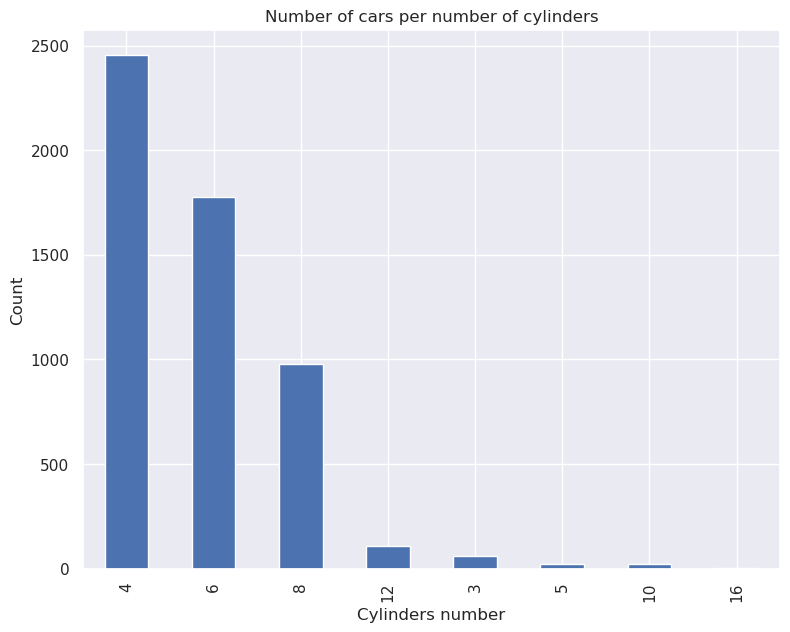

In [127]:
# Bars to visualize the number of cars per number of cylinders
co2_emissions["cylinders"].value_counts() \
    .plot(kind="bar")
plt.xlabel("Cylinders number")
plt.ylabel("Count")
plt.title("Number of cars per number of cylinders")
plt.show()

What we see here is that the majority of the cars are small to mid-size, meaning more economical cars. Here we take into account that every engine with cylinders above 6 is more powerful and respetictively consumes more fuel which results in higher amount of CO2. Let's confirm that by looking at engine vs CO2 emissions comparision

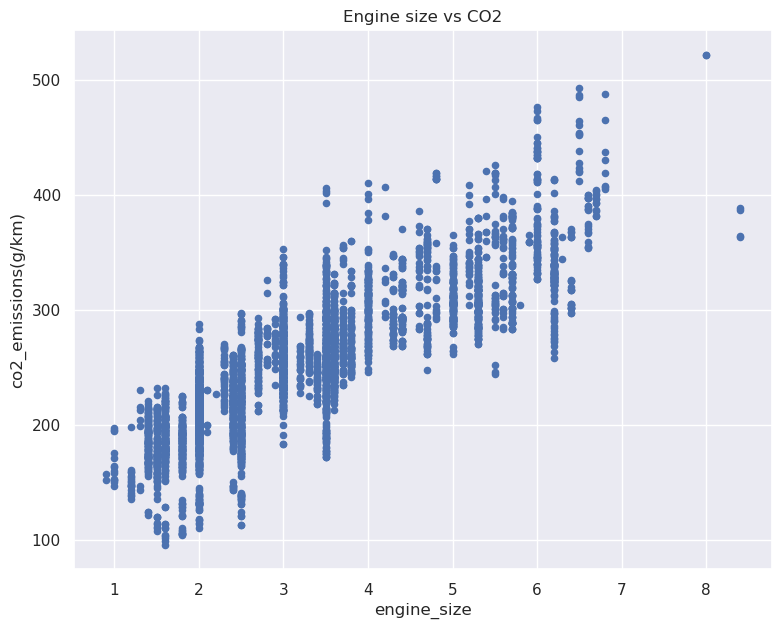

In [128]:
# Now let's check how engine size and co2 features are related:
co2_emissions.plot(kind = "scatter", \
         x = "engine_size", \
         y = "co2_emissions(g/km)", \
         title = "Engine size vs CO2")
plt.show()

As the data is highly correlated, we can see an identical pattern in engine size vs consumption combined comparison.

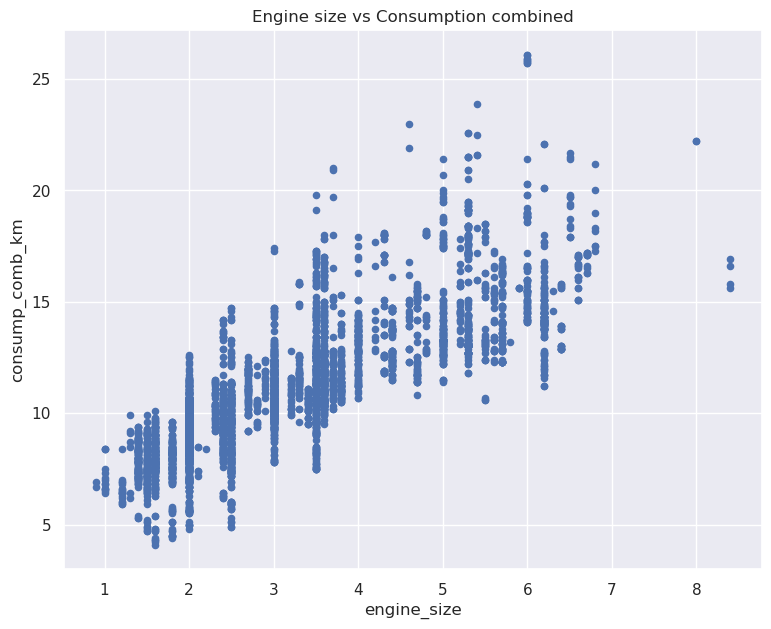

In [129]:
# Now let's check how engine size and consumption combined features are related:
co2_emissions.plot(kind = "scatter", \
         x = "engine_size", \
         y = "consump_comb_km", \
         title = "Engine size vs Consumption combined")
plt.show()

It is also worth looking at CO2 emissions distribution. We see that the mean of the distribution is located around 250(g/km)

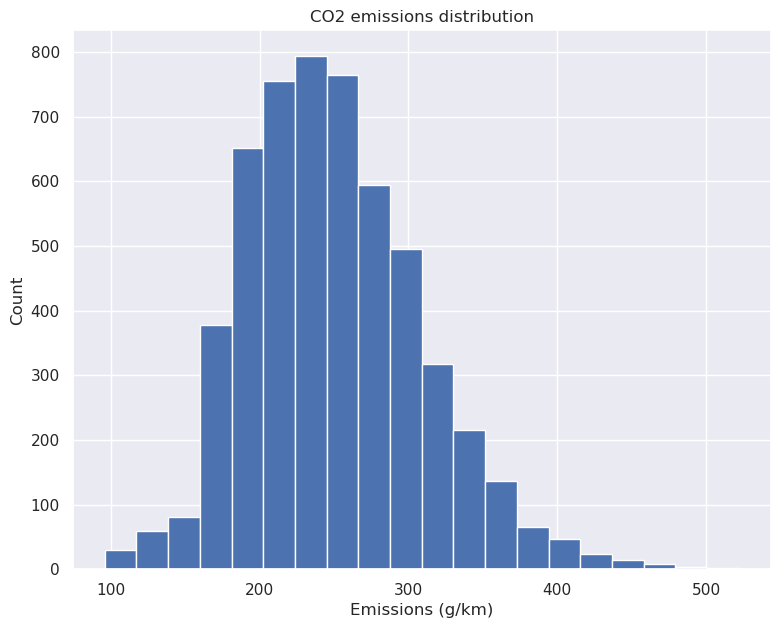

In [130]:
# Now let's see the distribution of CO2 emissions 
co2_emissions["co2_emissions(g/km)"].plot(kind = "hist", \
                bins = 20, \
                title = "CO2 emissions distribution")
plt.xlabel("Emissions (g/km)")
plt.ylabel("Count")
plt.show()

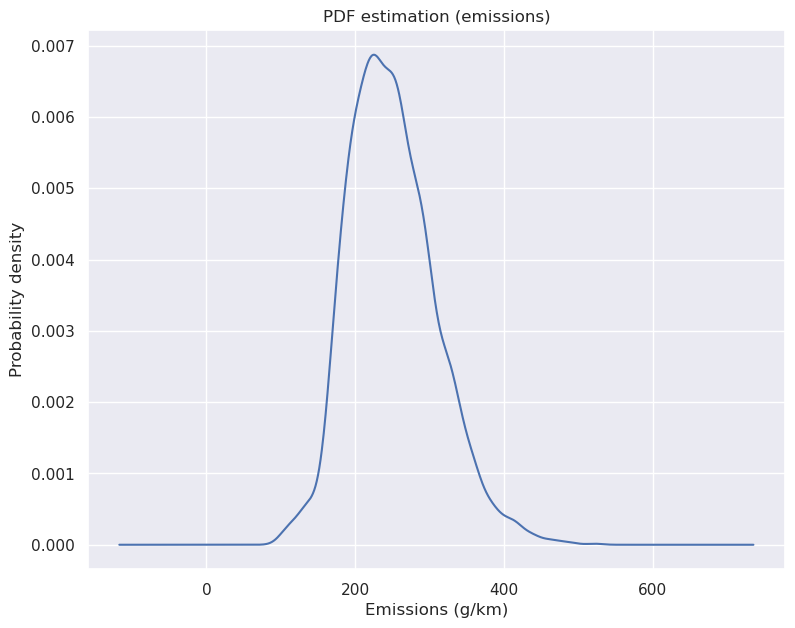

In [131]:
# Using kernel density estimation (KDE) we can also estimate the probability density of emissions column
co2_emissions["co2_emissions(g/km)"].plot(kind = "kde", \
                title = "PDF estimation (emissions)")
plt.xlabel("Emissions (g/km)")
plt.ylabel("Probability density")
plt.show()

In [132]:
# Extract the numberical columns
numeric_cols = [c for c in co2_emissions if pd.api.types.is_numeric_dtype(co2_emissions[c])]

In [133]:
#Double check and create correlation matrix
co2_emissions[numeric_cols].dropna().corr()

,engine_size,cylinders,consump_city,consump_hwy,consump_comb_km,co2_emissions(g/km)
engine_size,1.000000,0.927651,0.826521,0.760501,0.812863,0.847430
cylinders,0.927651,1.000000,0.790812,0.709040,0.771178,0.824013
consump_city,0.826521,0.790812,1.000000,0.950309,0.993950,0.915249
consump_hwy,0.760501,0.709040,0.950309,1.000000,0.978466,0.881518
consump_comb_km,0.812863,0.771178,0.993950,0.978466,1.000000,0.913942
co2_emissions(g/km),0.847430,0.824013,0.915249,0.881518,0.913942,1.000000


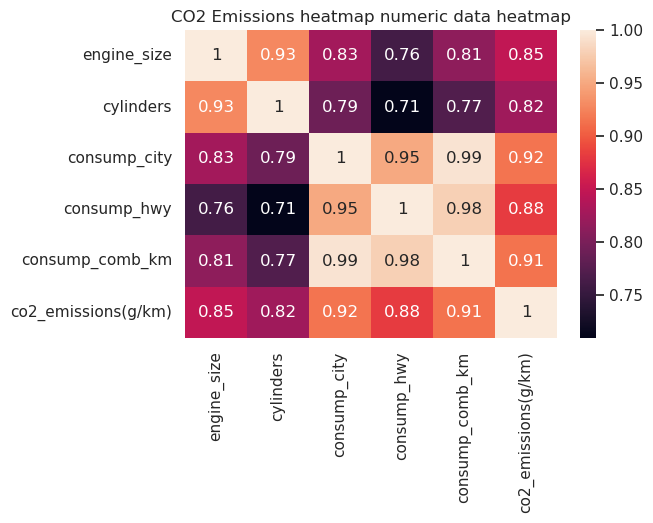

In [134]:
# We can also look at a heatmap
plt.figure(figsize = (6,4))
sns.heatmap(co2_emissions[numeric_cols].dropna().corr(), annot = True)
plt.title("CO2 Emissions heatmap numeric data heatmap")
plt.show()

<b>Conclusion:</b> As expected we see strong correlation between the different features. This is so, because they are just connected. Larger engine, more cylinders, higher consumption and respectively more polution.

## Merging CO2 Emissions and Cars datasets  <a class="anchor" id="section_40_1"></a>

To avoid inconsistencies in the brand names, we need to apply lower to each one of them. Otherwise we risk to lose valuable information.

In [135]:
co2_emissions[(co2_emissions["brand"] == "Bmw")].head(1)

,brand,model,engine_size,cylinders,transmission,fuel_type,consump_city,consump_hwy,consump_comb_km,co2_emissions(g/km)
76,Bmw,320i,2.0,4,Automatic,Gasoline,10.0,6.5,8.4,193


In [136]:
cars_to_merge.head(1)

,mileage,brand,model,fuel,gear,price,hp,year
0,235000.0,BMW,316,Diesel,Manual,6800,116.0,2011


In [137]:
cars_to_merge["brand"] = cars_to_merge["brand"].str.lower()
co2_emissions["brand"] = co2_emissions["brand"].str.lower()

During the preparation of the third dataframe, we will fix a little problem. In CO2 emissions dataset we have we have information regarding a few different brand/model combinations while in cars dataset, we do not have such an information. To achieve acceptable level of accuracy, we will take the mean values of the CO2 emissions when there are multiple entries for the same brand/model

In [138]:
# Create grouped entries and save the results in dict
co2_emissions_mean_dict = {"brand": [], "model": [], "co2_emissions_mean(g/km)": []}
for el in co2_emissions.groupby(["brand", "model"]):
    co2_emissions_mean_dict["brand"].append(el[0][0])
    co2_emissions_mean_dict["model"].append(el[0][1])
    co2_emissions_mean_dict["co2_emissions_mean(g/km)"].append(round(el[1]["co2_emissions(g/km)"].mean(), 2))

In [139]:
#Conver the above dict to df
co2_emissions_mean = pd.DataFrame.from_dict(co2_emissions_mean_dict)

In [140]:
# Merge the two datasets on brand and model columns
co2_emissions_mean = co2_emissions_mean.merge(cars_to_merge, how = "inner", on = ["brand", "model"])

In [141]:
#Drop the uncessary columns
co2_emissions_mean = co2_emissions_mean.drop(["hp", "price"], axis = 1)

In [142]:
#Reorder to columns to a more meaningful manner
co2_emissions_mean = co2_emissions_mean[["brand", "model", "year", "gear", "fuel", \
                                         "mileage", "co2_emissions_mean(g/km)"]]

In [143]:
# Let's create a new column called total_produced_co2_g. It represents the total CO2 Emissions in grams
# We multiply co2_emissions_mean(g/km) by the total km of each car
co2_emissions_mean['total_produced_co2_g'] = co2_emissions_mean[["co2_emissions_mean(g/km)"]].multiply(co2_emissions_mean["mileage"], axis="index")

In [144]:
# At some point we may need the CO2 emissions on tons
co2_emissions_mean["total_produced_co2_tons"] = co2_emissions_mean["total_produced_co2_g"].div(1000000, axis="index")

In [145]:
co2_emissions_mean

,brand,model,year,gear,fuel,mileage,co2_emissions_mean(g/km),total_produced_co2_g,total_produced_co2_tons
0,audi,A3,2012,Manual,Diesel,276000.0,203.27,56102520.00,56.102520
1,audi,A3,2019,Manual,Gasoline,15500.0,203.27,3150685.00,3.150685
2,audi,A3,2018,Automatic,Gasoline,66000.0,203.27,13415820.00,13.415820
3,audi,A3,2020,Automatic,Electric/Gasoline,14900.0,203.27,3028723.00,3.028723
4,audi,A3,2020,Automatic,Gasoline,9986.0,203.27,2029854.22,2.029854
...,...,...,...,...,...,...,...,...,...
10060,volvo,XC90,2020,Automatic,Electric/Gasoline,11223.0,244.64,2745594.72,2.745595
10061,volvo,XC90,2020,Automatic,Diesel,19200.0,244.64,4697088.00,4.697088
10062,volvo,XC90,2021,Automatic,Diesel,1000.0,244.64,244640.00,0.244640
10063,volvo,XC90,2021,Automatic,Diesel,5.0,244.64,1223.20,0.001223


In [146]:
co2_emissions_mean[(co2_emissions_mean['year'] == 2020)].groupby("fuel")["total_produced_co2_tons"].mean()

fuel
-/- (Fuel)           0.687750
CNG                  3.761262
Diesel               3.253629
Electric             1.949531
Electric/Diesel      1.025111
Electric/Gasoline    1.544473
Gasoline             1.942609
LPG                  0.090235
Name: total_produced_co2_tons, dtype: float64

In [147]:
co2_emissions_mean[(co2_emissions_mean['year'] == 2015) & (co2_emissions_mean["gear"] == \
                                                           "Automatic")]["total_produced_co2_tons"].mean()

22.56868385450893

# CO2 emissions mean

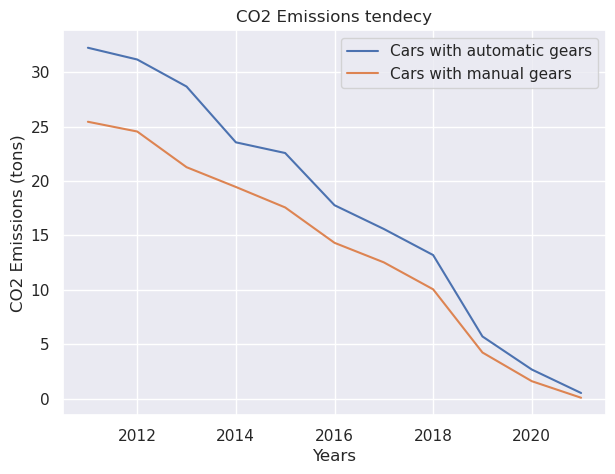

In [148]:
years, automatic, manual = [], [], []
for year in range(2011, 2022):
    mean_val = co2_emissions_mean[(co2_emissions_mean['year'] == year)\
                                 ].groupby("gear")["total_produced_co2_tons"].mean()
    years.append(year)
    automatic.append(mean_val[0])
    manual.append(mean_val[1])

# plot lines
plt.figure(figsize = (7, 5))
plt.plot(years, automatic, label = "Cars with automatic gears")
plt.plot(years, manual, label = "Cars with manual gears")
plt.xlabel("Years")
plt.ylabel("CO2 Emissions (tons)")
plt.title("CO2 Emissions tendecy")
plt.legend()
plt.show()

In [149]:
co2_emissions_mean[(co2_emissions_mean['year'] == 2011)].groupby("fuel")["total_produced_co2_tons"].mean()

fuel
Diesel               37.699549
Electric/Gasoline    13.185679
Gasoline             21.709515
Name: total_produced_co2_tons, dtype: float64

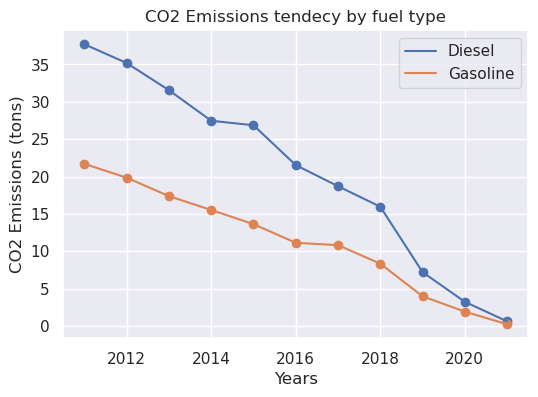

In [150]:
years, diesel, gasoline = [], [], []
for year in range(2011, 2022):
    diesel_mean = co2_emissions_mean[(co2_emissions_mean["year"] == year) & (co2_emissions_mean["fuel"] == "Diesel")]["total_produced_co2_tons"].mean()
    gasoline_mean = co2_emissions_mean[(co2_emissions_mean["year"] == year) & (co2_emissions_mean["fuel"] == "Gasoline")]["total_produced_co2_tons"].mean()
    years.append(year)
    diesel.append(diesel_mean)
    gasoline.append(gasoline_mean)

# plot lines
plt.figure(figsize = (6, 4))
plt.plot(years, diesel, label = "Diesel")
plt.plot(years, gasoline, label = "Gasoline")
plt.scatter(years, diesel)
plt.scatter(years, gasoline)
plt.xlabel("Years")
plt.ylabel("CO2 Emissions (tons)")
plt.title("CO2 Emissions tendecy by fuel type")
plt.legend()
plt.show()

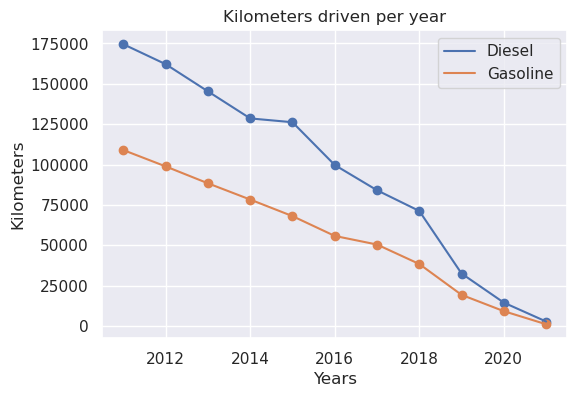

In [151]:
years, diesel, gasoline = [], [], []
for year in range(2011, 2022):
    diesel_mean = co2_emissions_mean[(co2_emissions_mean["year"] == year) & (co2_emissions_mean["fuel"] == "Diesel")]["mileage"].mean()
    gasoline_mean = co2_emissions_mean[(co2_emissions_mean["year"] == year) & (co2_emissions_mean["fuel"] == "Gasoline")]["mileage"].mean()
    years.append(year)
    diesel.append(diesel_mean)
    gasoline.append(gasoline_mean)

# plot lines
plt.figure(figsize = (6, 4))
plt.plot(years, diesel, label = "Diesel")
plt.plot(years, gasoline, label = "Gasoline")
plt.scatter(years, diesel)
plt.scatter(years, gasoline)
plt.xlabel("Years")
plt.ylabel("Kilometers")
plt.title("Kilometers driven per year")
plt.legend()
plt.show()

In [152]:
co2_emissions_mean[(co2_emissions_mean["year"] == 2011) & (co2_emissions_mean["fuel"] == "Gasoline")]["mileage"].mean()

108930.99034749034

In [153]:
co2_emissions_mean[(co2_emissions_mean["year"] == 2011) & (co2_emissions_mean["fuel"] == "Diesel")]["mileage"].mean()

174492.12267657992

In [154]:
co2_emissions_mean[(co2_emissions_mean['year'] == 2011)\
                                 ].groupby("fuel")["co2_emissions_mean(g/km)"].mean()

fuel
Diesel               215.849368
Electric/Gasoline    119.045455
Gasoline             198.524903
Name: co2_emissions_mean(g/km), dtype: float64

In [155]:
co2_emissions_mean[(co2_emissions_mean['year'] == 2017)\
                                 ].groupby("fuel")["co2_emissions_mean(g/km)"].mean()

fuel
-/- (Fuel)           210.000000
CNG                  210.260000
Diesel               225.754524
Electric             200.711429
Electric/Diesel      247.977143
Electric/Gasoline    199.735517
Gasoline             211.933854
LPG                  203.270000
Name: co2_emissions_mean(g/km), dtype: float64

In [156]:
co2_emissions_mean[(co2_emissions_mean['year'] == 2020)\
                                 ].groupby("fuel")["co2_emissions_mean(g/km)"].mean()

fuel
-/- (Fuel)           196.500000
CNG                  208.465000
Diesel               224.453009
Electric             199.775000
Electric/Diesel      239.320000
Electric/Gasoline    204.805986
Gasoline             207.684803
LPG                  180.470000
Name: co2_emissions_mean(g/km), dtype: float64

In [157]:
co2_emissions_mean[(co2_emissions_mean["year"] == 2011)]["total_produced_co2_tons"].sum()

21531.7499872

In [158]:
groups = co2_emissions_mean.groupby("year")

In [159]:
for name, group in groups:
    print(name)
    print(round(group["total_produced_co2_tons"].sum(), 2))

2011
21531.75
2012
23611.73
2013
20285.92
2014
16041.71
2015
14805.93
2016
11022.48
2017
14570.02
2018
14219.89
2019
5687.22
2020
2674.11
2021
247.46


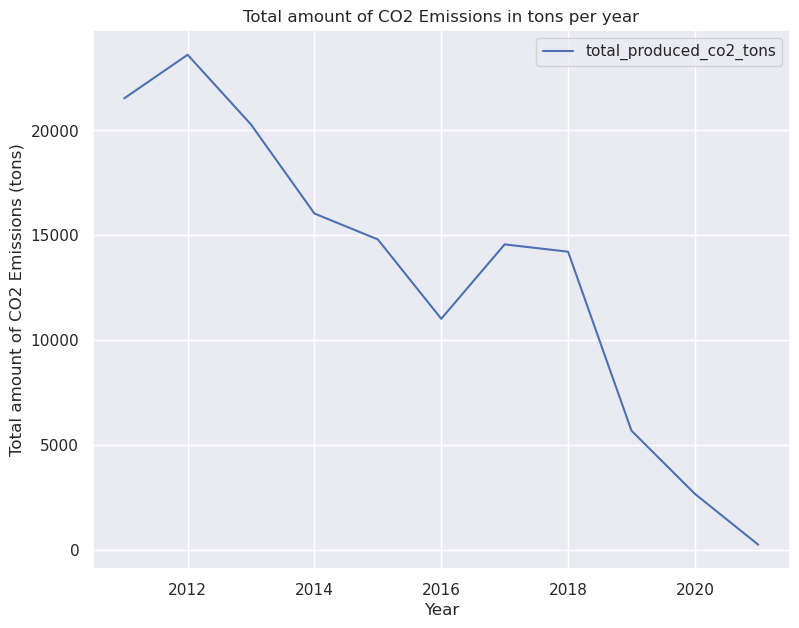

In [160]:
co2_emissions_mean.groupby('year')['total_produced_co2_tons'].sum().plot(legend=True)
plt.xlabel("Year")
plt.ylabel("Total amount of CO2 Emissions (tons)")
plt.title("Total amount of CO2 Emissions in tons per year")
plt.show()

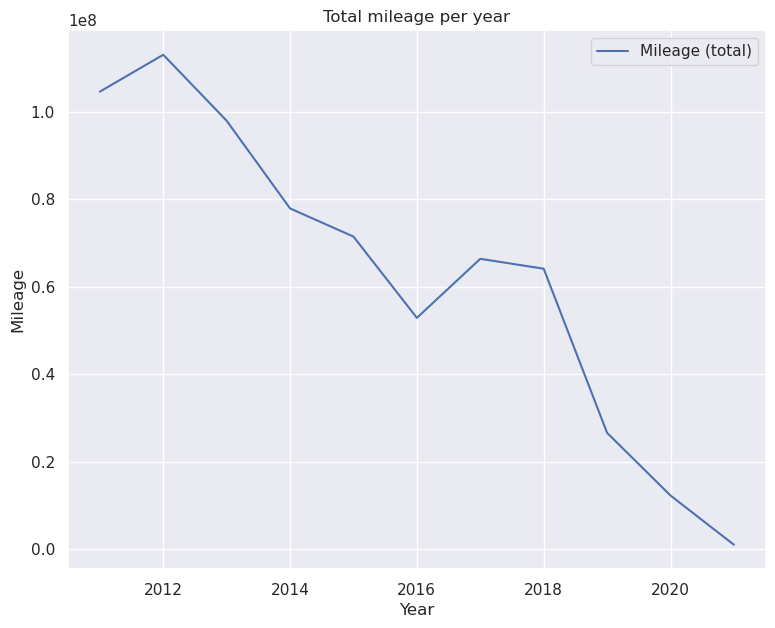

In [161]:
co2_emissions_mean.groupby('year')['mileage'].sum().plot(legend=True, label="Mileage (total)")
plt.xlabel("Year")
plt.ylabel("Mileage")
plt.title("Total mileage per year")
plt.show()

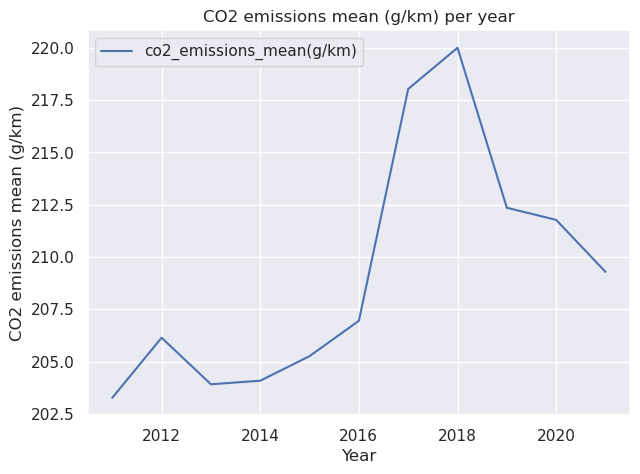

In [162]:
plt.figure(figsize = (7, 5))
co2_emissions_mean.groupby('year')['co2_emissions_mean(g/km)'].mean().plot(legend=True, )
plt.xlabel("Year")
plt.ylabel("CO2 emissions mean (g/km)")
plt.title("CO2 emissions mean (g/km) per year")
plt.show()

In [163]:
test = co2_emissions_mean.groupby('year')

In [164]:
years = []
counts = []
for name, group in test:
    years.append(name)
    counts.append(group["brand"].count())

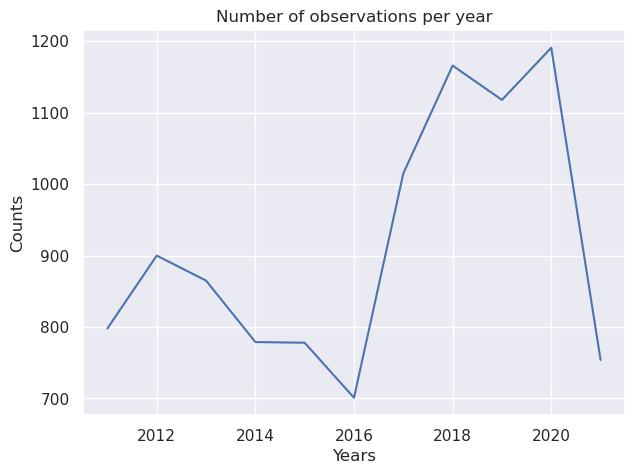

In [165]:
#Number of observations per year
plt.figure(figsize = (7, 5))
plt.plot(years, counts)
plt.xlabel("Years")
plt.ylabel("Counts")
plt.title("Number of observations per year")
plt.show()

In [166]:
sum(counts)

10065

In [167]:
co2_emissions_mean

,brand,model,year,gear,fuel,mileage,co2_emissions_mean(g/km),total_produced_co2_g,total_produced_co2_tons
0,audi,A3,2012,Manual,Diesel,276000.0,203.27,56102520.00,56.102520
1,audi,A3,2019,Manual,Gasoline,15500.0,203.27,3150685.00,3.150685
2,audi,A3,2018,Automatic,Gasoline,66000.0,203.27,13415820.00,13.415820
3,audi,A3,2020,Automatic,Electric/Gasoline,14900.0,203.27,3028723.00,3.028723
4,audi,A3,2020,Automatic,Gasoline,9986.0,203.27,2029854.22,2.029854
...,...,...,...,...,...,...,...,...,...
10060,volvo,XC90,2020,Automatic,Electric/Gasoline,11223.0,244.64,2745594.72,2.745595
10061,volvo,XC90,2020,Automatic,Diesel,19200.0,244.64,4697088.00,4.697088
10062,volvo,XC90,2021,Automatic,Diesel,1000.0,244.64,244640.00,0.244640
10063,volvo,XC90,2021,Automatic,Diesel,5.0,244.64,1223.20,0.001223


In [168]:
cars_limited = cars[(cars['make'].str.contains('BMW|Volkswagen|Opel|Ford|Skoda|Renault', regex=True))]

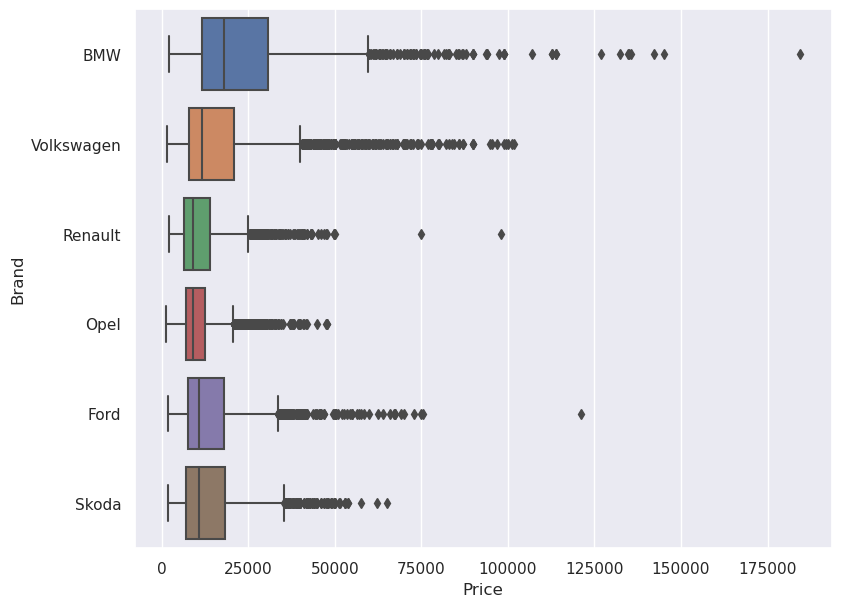

In [169]:
sns.boxplot(data=cars_limited, x="price", y="make")
plt.xlabel("Price")
plt.ylabel("Brand")
plt.show()